# Obtención de insights a partir de visualizaciones
---
## Consigna

Generar insights que permitan dar respuesta a las preguntas por responder

---



## Abstract

El siguiente trabajo tiene como propósito dar una aproximación inicial a una solución para un problema de negocios, dando énfasis a la generación de un futuro modelo predictivo. 

Se presenta la definición del contexto comercial del problema que se quiere dar solución, donde el foco principal es la evaluación de un proyecto, en este caso se trata de un videojuego por desarrollar. Esto con el fin de lograr una asignación de presupuesto suficiente para el desarrollo del proyecto considerando el éxito esperado de este.

Para solucionar el problema comercial propuesto, se plantea la utilización de data histórica de distintos videojuegos, considerando variables cualitativas y variables que describen la recepción del público en general y de la crítica especializada.

Mediante el contexto analítico se muestra cómo se presenta el dataset a utilizar, sus características y cómo se debería tratar para poder servir como input en este análisis.

Finalmente se realiza un análisis exploratorio de datos a partir de visualizaciones y estadística descriptiva, donde se ve el comportamiento de distintas variables y cómo estas responden a los problemas planteados mediante los insights que ofrecen. En base a esto, se van validando hipótesis para terminar con una conclusión final que permita guiar a los equipos desarrolladores de videojuegos.

## API a utilizar: RAWG

RAWG es la base de datos más grande de videojuegos que existe en la actualidad, además de ser un servicio de descubrimiento y recomendaciones de videojuegos. Comparten más de 500.000 datos sobre videojuegos, además de proveer recomendaciones basadas en machine learning.

Esta API puede servir de mucho para el proyecto de data science que se viene desarrollando en entregas anteriores, incluso podría servir para reemplazar la base de datos actual y enriquecerla con nueva data.

A continuación, se presenta una exploración de dicha API y la obtención de la data respectiva para luego detectar outliers y realizar un análisis univariado.

In [1]:
# Llibrerías a utilizar
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.dtypes.cast import date
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# Clave de API de Rawg
api_key = "00565200b6154b65b4751d6ee239866d"

# Número máximo de juegos a obtener
max_games = 10000

# Lista vacía para almacenar los datos de los juegos
game_data = []

# Inicializar la variable page en 1
page = 1

# Ciclo para obtener los datos de los juegos
while len(game_data) < max_games:
    
    # URL de la API de Rawg para obtener los juegos de la página actual
    url = f"https://api.rawg.io/api/games?key={api_key}&page={page}"
    
    # Solicitud GET a la API de Rawg
    response = requests.get(url)
    
    # Convertir la respuesta JSON en un diccionario de Python
    data = response.json()   
    # Obtener los datos de cada juego de la página actual y añadirlos a la lista
    for result in data["results"]:
        game_data.append({
            "Nombre": result.get("name", ""),
            "Fecha_Lanzamiento": result.get("released", ""),
            "Plataformas": ", ".join([platform["platform"]["name"] for platform in result.get("platforms", [])]),
            "Generos": ", ".join([genre["name"] for genre in result.get("genres", [])]),
            "Desarrolladores": ", ".join([developer["name"] for developer in result.get("developers", [])]),
            "Editores": ", ".join([publisher["name"] for publisher in result.get("publishers", [])]),
            "Puntuacion": result.get("rating", ""),
            "Puntuacion_Top": result.get("rating_top", ""),
            "Descripcion": result.get("description", ""),
            "URL_Imagen": result.get("background_image", ""),
            "Sitio_Web": result.get("website", ""),
            "Metacritic": result.get("metacritic", ""),
            "Rating_ESRB": result.get("esrb_rating")["name"] if result.get("esrb_rating") is not None else "",
            "Rating_PEGI": result.get("pegi_rating", {}).get("name", ""),
            "Tags": ", ".join([tag["name"] for tag in result.get("tags", [])]),
            "Comentarios": result.get("comments_count", ""),
            "Reviews": result.get("reviews_count", ""),
            "Playtime": result.get("playtime", ""),
            "Playtime_Completionist": result.get("playtime_completionist", ""),
            "Median_Playtime": result.get("playtime_median", "")
        })
    
    # Incrementar la variable page en 1 para obtener la siguiente página
    page += 1
    
# Crear dataframe
df = pd.DataFrame(game_data)

# Mostrar el dataframe
df

# Exporta el DataFrame a un archivo CSV
df.to_csv('bbdd_RAWG.csv', index=False)

## Preguntas/hipótesis a responder

Dada la estructura de la data importada, surgen las siguientes preguntas:
1.	¿Es relevante el Playtime (duración del videojuego) como indicador de que las críticas de los usuarios y la crítica especializada van a ser buenas?

  La lógica sugiere que videojuegos con mayor duración, deberían tener mayores horas de desarrollo, por ende, deberían ser más depurados como productos finales. Por lo tanto, se esperaría que productos finales de mejor calidad fuesen mejor evaluados por la crítica especializada y el público en general.

2.	¿Es relevante la cantidad de reseñas como indicador de que las críticas de los usuarios y la crítica especializada van a ser buenas?

  Se esperaría que la decisión voluntaria por parte de un usuario de dejar una reseña sea motivada por la experiencia que tuvo con el videojuego en cuestión. Es por esto que, hipotéticamente, debería existir una correlación directa entre la cantidad de reseñas y el puntaje otorgado por la crítica de los usuarios.

3.	¿Existen tags que permitan asegurar una mejor puntuación de la crítica?

  La inclinación hacia cierto tipo de videojuegos por parte de la crítica puede ser un indicio sobre cómo se debe desarrollar un videojuego para que tenga cierto nivel de éxito, es por acotarse a ciertos tags sea prudente a la hora de considerar qué características desarrollar en un videojuego para alcanzar una buena crítica, donde los tags más populares pueden asegurar cierto nivel de éxito en críticas.


## Resumen de Metadata

### Descripción de Variables
| Columna | Descripción |
| --- | --- |
| Nombre | Nombre del videojuego |
| Fecha_Lanzamiento | Fecha de lanzamiento del videojuego |
| Plataformas | Plataformas dónde se puede encopntrar el videojuego (PC, PS4, etc.) |
| Generos | Géneros asociados al videojuego |
| Desarrolladores | Desarrolladores del videojuego |
| Editores | Editor del videojuego |
| Puntuacion | Puntaje otorgado por el público en general al videojuego |
| Puntuacion_Top | Puntaje máximo obtenido por el videojuego |
| Descripcion | Breve descripción del videojuego |
| URL_Imagen | URL de la imagen asociada al videojuego |
| Sitio_Web | Sitio Web del Videojuego. |
| Metacritic | Puntaje agregado del staff de Metacritic |
| Rating_ESRB | Clasificación asignada por la ESRB (América) |
| Rating_PEGI | Clasificación asignada por la ESRB (Europa) |
| Tags | Tags asociados al videojuego |
| Comentarios | Comentarios asociados al videojuego |
| Reviews | Cantidad de reseñas que recibió el videojuego |
| Playtime | Tiempo de juego estimaado del videojuego |
| Playtime_Completionist | Tiempo de juego estimaado para completar en un 100% el videojuego |
| Median_Playtime | Mediana del tiempo de juego del videojuego |


## Resumen del dataframe

In [3]:
# Resumen de variables
print("Resumen de variables\n-------------------")
print(df.info(),'')
print("-------------------\n")

# Obtener la cantidad de valores nulos por columna
nulos_por_columna = df.isnull().sum()
print("Valores NaN por columna\n-------------------")
print(nulos_por_columna)
print("-------------------\n")

Resumen de variables
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nombre                  10000 non-null  object 
 1   Fecha_Lanzamiento       9841 non-null   object 
 2   Plataformas             10000 non-null  object 
 3   Generos                 10000 non-null  object 
 4   Desarrolladores         10000 non-null  object 
 5   Editores                10000 non-null  object 
 6   Puntuacion              10000 non-null  float64
 7   Puntuacion_Top          10000 non-null  int64  
 8   Descripcion             10000 non-null  object 
 9   URL_Imagen              9980 non-null   object 
 10  Sitio_Web               10000 non-null  object 
 11  Metacritic              4418 non-null   float64
 12  Rating_ESRB             10000 non-null  object 
 13  Rating_PEGI             10000 non-null  object 
 14

## Detección de Outliers

<Axes: >

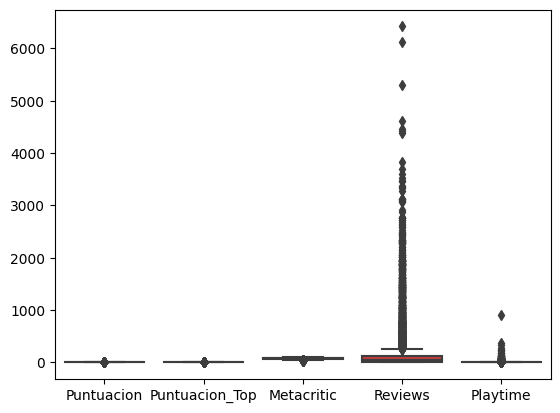

In [4]:
# Detección de outliers en variables numéricas
sns.boxplot(data=df)

### Interpretación

Se puede apreciar que las variables Puntuación, Puntuación_Top y Metacritic se concentran alrededor de la media. Mientras que Reviews tiene valores muy alejados, por sobre 6000. Playtime presenta un caso similar, pero no tan acentuado, donde se puede apreciar que existe un valor cercano a 1000. En primera instancia, no sería tan relevante sacar outliers o reemplazar sus valores, ya que representan la realidad de lo que explican. Distinto sería si la variable Metacritic tuviese outliers, porque son valores predefinidos, por lo tanto, un valor muy alejado claramente podría significar, por ejemplo, un error de tipificación.

## Análisis Univariado

In [5]:
#Selección de Variables Numéricas solamente para evaluar
df_numeric = df.select_dtypes(include=['int', 'float'])

# Descripción estadística del DataFrame
print("Resumen Estadístico\n-------------------")
print(df_numeric.describe())
print("-------------------\n")

# Media
print("Media\n-------------------")
print(df_numeric.mean())
print("-------------------\n")

# Mediana
print("Mediana\n-------------------")
print(df_numeric.median())
print("-------------------\n")

# Moda
print("Moda\n-------------------")
print(df_numeric.mode())
print("-------------------\n")

# Varianza
print("Varianza\n-------------------")
print(df_numeric.var())
print("-------------------\n")

# Desviación estándar
print("Desviación Estandar\n-------------------")
print(df_numeric.std())
print("-------------------\n")

Resumen Estadístico
-------------------
        Puntuacion  Puntuacion_Top   Metacritic       Reviews      Playtime
count  10000.00000    10000.000000  4418.000000  10000.000000  10000.000000
mean       2.97908        3.143700    74.726799    142.300100      3.815000
std        1.11416        1.425571    10.557917    344.191787     13.391905
min        0.00000        0.000000    23.000000      0.000000      0.000000
25%        2.48000        3.000000    69.000000     14.000000      1.000000
50%        3.22000        4.000000    76.000000     37.000000      2.000000
75%        3.78000        4.000000    82.000000    112.000000      4.000000
max        4.80000        5.000000    99.000000   6422.000000    900.000000
-------------------

Media
-------------------
Puntuacion          2.979080
Puntuacion_Top      3.143700
Metacritic         74.726799
Reviews           142.300100
Playtime            3.815000
dtype: float64
-------------------

Mediana
-------------------
Puntuacion         3

### Interpretación
#### Resumen estadístico
Uno de los resúmenes de las variables que más llama la atención es el de la cuenta de datos de Metacritic. En total son 4388, dejando 5612 filas sin puntuación de Metacritic. Para un tratamiento de datos es necesario evaluar qué metodología es la mejor para tratar los NaN. En este caso, no sería tan descabellado considerar el reemplazo de esos valores usando la media, ya que la desviación estándar es de 10.53 y si contrastamos la media con la mediana, podemos apreciar que no están tan alejadas, lo cual, valida nuestra decisión.


## Análisis Bivariado

### Playtime vs Metacritic

<Axes: xlabel='Playtime', ylabel='Metacritic'>

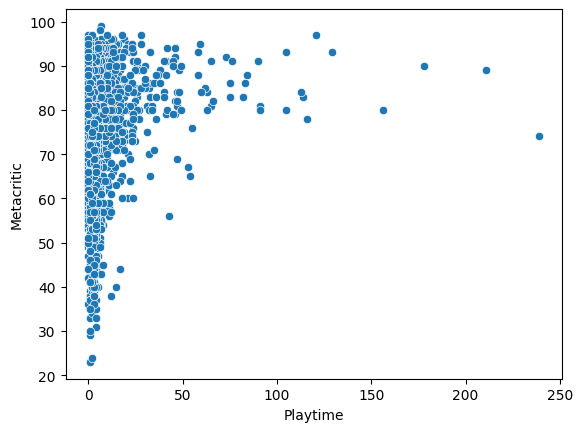

In [6]:
#Selección de Variables Numéricas solamente para evaluar
df_numeric = df.select_dtypes(include=['int', 'float'])

# Visualización de Playtime y Metacritic
sns.scatterplot(x="Playtime", y="Metacritic", data=df_numeric)

#### Interpretación

Se puede apreciar un pequeño aumento de en la puntuación de Metacritic a medida que Playtime aumenta, pero se acumulan en valores de Playtime bajos. Algo que se puede asegurar es que los valores de Playtime más altos, no van a mostrar valores de Metacritic bajos. Esto obedece un sentido lógico, donde el desarrollar videojuegos más largos en duración requiere mayor dedicación en su desarrollo y en su testeo como tal previo al lanzamiento, por lo tanto, un producto de mejor calidad para los ojos de la crítica especializada.

### Playtime vs Reviews

<Axes: xlabel='Playtime', ylabel='Reviews'>

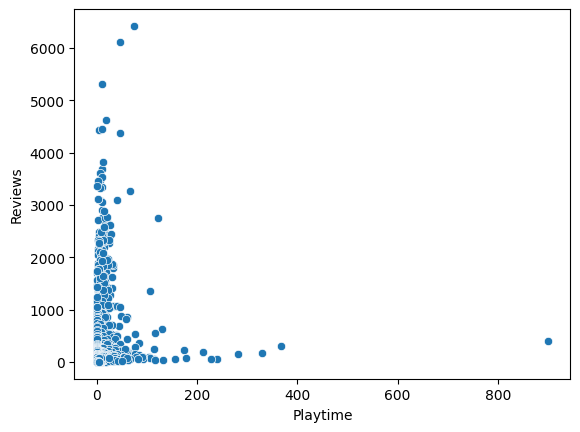

In [7]:
# Selección de Variables Numéricas solamente para evaluar
df_numeric = df.select_dtypes(include=['int', 'float'])

# Visualización de Playtime y Reviews
sns.scatterplot(x="Playtime", y="Reviews", data=df_numeric)

#### Interpretación

Podemos ver que a medida que el valor de Playtime aumenta, son menos las Reviews que recibe el videojuego. Para valores de tiempo de juego entre 0 y 50 es donde se acumula la mayor cantidad de reviews. El insight que nos permite obtener es que el público general se inclina hacia videojuegos de mediana duración y esos les dedica un tiempo para dejar una reseña.

### Reviews vs Puntuación

<Axes: xlabel='Reviews', ylabel='Puntuacion'>

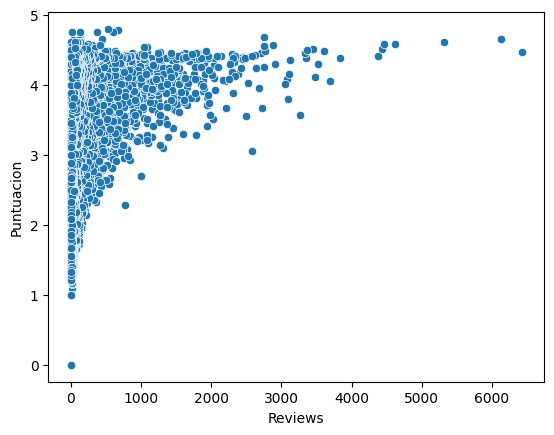

In [8]:
# Selección de Variables Numéricas solamente para evaluar
df_numeric = df.select_dtypes(include=['int', 'float'])

# Visualización de Reviews y Puntuación
sns.scatterplot(x="Reviews", y="Puntuacion", data=df_numeric)

#### Interpretación

La distribución de las Reviews va acorde a un decrecimiento de la variabilidad de las puntuaciones a medida que aumenta la cantidad de reseñas. Sin embargo, como cada punto en particular es un videojuego en específico, sí es factible decir que un videojuego con mayores reviews es más probable que tenga puntuaciones más altas. 

### Reviews vs Metacritic

<Axes: xlabel='Reviews', ylabel='Metacritic'>

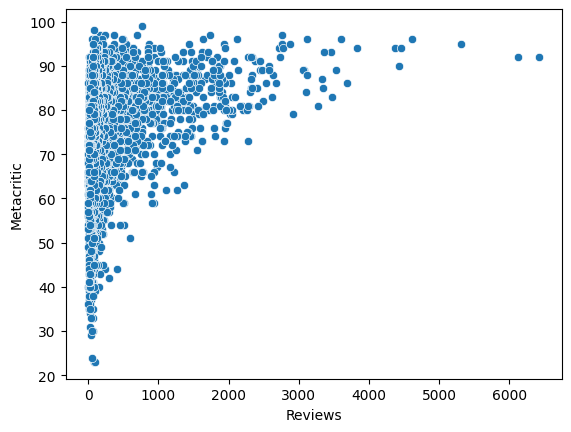

In [9]:
# Selección de Variables Numéricas solamente para evaluar
df_numeric = df.select_dtypes(include=['int', 'float'])

# Visualización de Reviews y Metacritic
sns.scatterplot(x="Reviews", y="Metacritic", data=df_numeric)

#### Interpretación

Al igual que el caso anterior, se puede apreciar que una mayor cantidad de reseñas de usuarios si disminuye la variabilidad de puntuaciones posibles que se pueden encontrar de Metacritic. Esto puede ser un input interesante para definir la calidad de un videojuego, por lo menos en términos de popularidad.

## Análisis Multivariado

<Axes: >

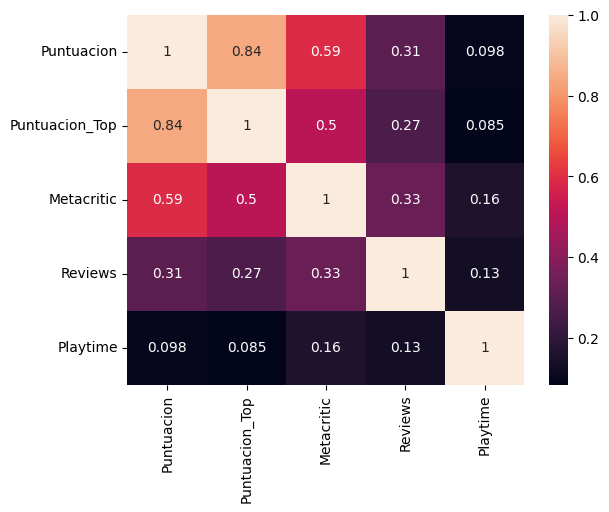

In [10]:
# Selección de Variables Numéricas solamente para evaluar
df_numeric = df.select_dtypes(include=['int', 'float'])

# Matriz de Correlación
matriz_correlacion = df_numeric.corr()
sns.heatmap(matriz_correlacion, annot=True)

### Interpretación

Dentro de las variables observadas en la matriz de correlación, podemos apreciar que Playtime tiene una correlación muy baja con el resto de las variables, lo cual obedece un poco al hecho de que esta es una variable propia del videojuego, es decir, una característica. Mientras tanto, el resto de las variables, están sujetas a opiniones, en otras palabras, son subjetivas y describren al producto desde el punto de vista del consumidor. Por esa razón, tiene cierta lógica que se presenten correlaciones tan bajas.

Se destaca la correlación de 0,59 existente entre Metacritic y Puntuacion. Esto sugiere que hay cierto consenso general entre la crítica especializada y la opinión del público en general. Sin embargo, podría darse el caso de que esta correlación pueda ser aún mayor si es que se analiza a fondo la presencia de outliers en ambas variables y se realiza el tratamiento adecuado. 

## Data Wrangling

In [11]:
# Data Wrangling

# Contamos valores nulos en cada columna
print(df.isna().sum())

# Eliminamos duplicados en caso de que existan
df = df.drop_duplicates()

# Cambio de tipos de variable Fecha_Lanzamiento
df["Fecha_Lanzamiento"] = pd.to_datetime(df["Fecha_Lanzamiento"], errors='coerce').dt.date

# Eliminamos las filas con valores nulos en Fecha_Lanzamiento
df = df.dropna(subset=['Fecha_Lanzamiento'])

# Rellenamos todas las filas que tengan vallores nulos en URL_Imagen
df['URL_Imagen'] = df['URL_Imagen'].fillna('Not Found')

# Calculamos el valor promedio de la columna Metacritic
mean_metacritic = df["Metacritic"].mean()

# Rellenamos los valores nulos de la columna Metacritic con el valor promedio
df["Metacritic"].fillna(mean_metacritic, inplace=True)

#Exportamos a .csv
df.to_csv("juegos_rawg_PostDW.csv", index=False)

Nombre                       0
Fecha_Lanzamiento          159
Plataformas                  0
Generos                      0
Desarrolladores              0
Editores                     0
Puntuacion                   0
Puntuacion_Top               0
Descripcion                  0
URL_Imagen                  20
Sitio_Web                    0
Metacritic                5582
Rating_ESRB                  0
Rating_PEGI                  0
Tags                         0
Comentarios                  0
Reviews                      0
Playtime                     0
Playtime_Completionist       0
Median_Playtime              0
dtype: int64


## Visualizaciones Adicionales

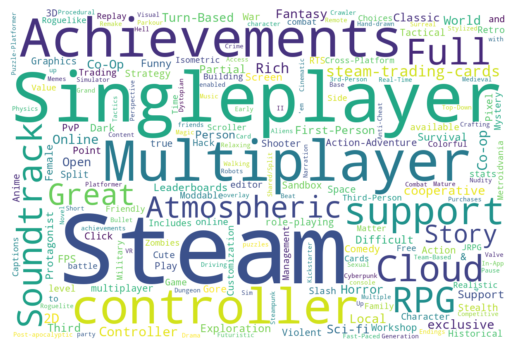

In [12]:
# Nube de palabras de Tags donde metacritic sea mayor a la media

# Crear un filtro para seleccionar solo las filas con valores mayores a la media
filtro = df['Metacritic'] > mean_metacritic

# Aplicar el filtro al DataFrame
df_filtrado = df[filtro]

# Unir todas las etiquetas en una sola cadena
all_tags = ' '.join(df_filtrado['Tags'].str.replace(',', ''))

# Tokenizar la cadena en palabras
tokens = word_tokenize(all_tags)

# Contar la frecuencia de cada palabra
word_counts = Counter(tokens)

# Crear la nube de palabras
wordcloud = WordCloud(width = 1200, height = 800, 
                      background_color ='white', 
                       min_font_size = 10).generate_from_frequencies(word_counts)


# Mostrar la nube de palabras

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

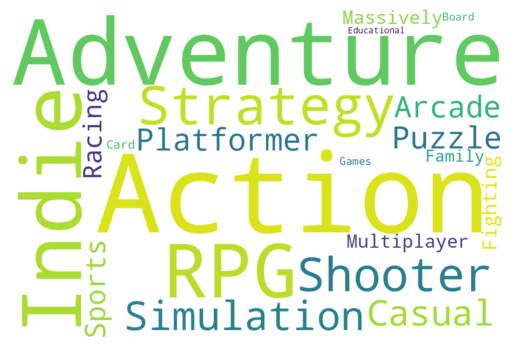

In [13]:
# Nube de palabras de Géneros donde metacritic sea mayor a la media

# Crear un filtro para seleccionar solo las filas con valores mayores a la media
filtro = df['Metacritic'] > mean_metacritic

# Aplicar el filtro al DataFrame
df_filtrado = df[filtro]

# Unir todas las etiquetas en una sola cadena
all_tags_g = ' '.join(df_filtrado['Generos'].str.replace(',', ''))

# Tokenizar la cadena en palabras
tokens_g = word_tokenize(all_tags_g)

# Contar la frecuencia de cada palabra
word_counts = Counter(tokens_g)

# Crear la nube de palabras
wordcloud_g = WordCloud(width = 1200, height = 800, 
                      background_color ='white', 
                       min_font_size = 10).generate_from_frequencies(word_counts)


# Mostrar la nube de palabras

plt.imshow(wordcloud_g, interpolation='bilinear')
plt.axis("off")
plt.show()

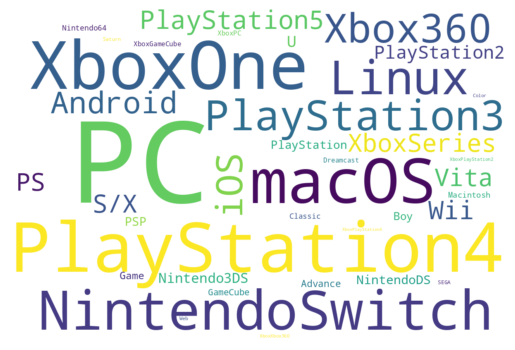

In [14]:
# Nube de palabras de Plataformas donde Metacritic sea mayor a la media

# Crear un filtro para seleccionar solo las filas con valores mayores a la media
filtro = df['Metacritic'] > mean_metacritic

# Aplicar el filtro al DataFrame
df_filtrado = df[filtro]

# Unir todas las etiquetas en una sola cadena
all_tags_p = ' '.join(df_filtrado['Plataformas'].str.replace(',', ''))

# Utilizar expresión regular para unir palabras compuestas con números
all_tags_p = re.sub(r'(\b\w+\s\d+\b)', lambda match: match.group(0).replace(" ", ""), all_tags_p)

# Utilizar expresión regular para unir plataformas de Xbox
all_tags_p = re.sub(r'(Xbox\s\w+)', lambda match: match.group(0).replace(" ", ""), all_tags_p)

# Utilizar expresión regular para unir plataformas de Nintendo
all_tags_p = re.sub(r'(Nintendo\s\w+)', lambda match: match.group(0).replace(" ", ""), all_tags_p)

# Tokenizar la cadena en palabras
tokens_p = word_tokenize(all_tags_p)

# Contar la frecuencia de cada palabra
word_counts = Counter(tokens_p)

# Crear la nube de palabras
wordcloud_p = WordCloud(width=1200, height=800, background_color='white',
                        min_font_size=10).generate_from_frequencies(word_counts)

# Mostrar la nube de palabras
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.axis("off")
plt.show()

### Interpretación

Se puede apreciar que al filtrar los videojuegos cuyo puntaje según la crítica especializada sea mayor que la media, los tags más populares son Steam, Achievements, Multiplayer, Singleplayer, Controller, RPG, entre otros. 

Por otro lado, si hacemos el mismo tratamiento para los géneros, se puede evidenciar que los géneros más populares son Action, Indie, Adventure, RPG, Strategy. 

Finalmente, también podemos ver que plataformas son las más populares. Gran parte de los videojuegos que están en el mercado se encuentran en PC, por lo que el desarrollo de un proyecto nuevo debería tener eso en mente como requisito para asegurar cierto nivel de audiencia. 

Con esto en mente, el equipo desarrollador podría guiar sus esfuerzos para sentar una base sobre qué características son las principales a desarrollar en el proyecto para poder asegurar cierto nivel de éxito o popularidad en el mercado. Además, permite apoyar la asignación de presupuesto considerando que ciertos géneros pueden traducirse en un perfil más recatado respecto al riesgo asociado a las ventas esperadas.

## Insights Relevantes

Considerando las preguntas anteriormente expuestas, se puede evidenciar que la duración del videojuego (Playtime) no representa un factor preponderante a la hora de influir en las críticas negativas o positivas, mostrando una correlación muy baja con Metacritic y la crítica de los usuarios. Por lo tanto, no debería influir en las decisiones del equipo desarrollador el cuánto dura el videojuego, sino que el foco debería ser los aspectos de calidad.

La cantidad de reseñas, para ambos tipos de críticas, demostró una acumulación hacia valores entre las 2000 y las 3000 reseñas para los valores más altos. Esto podría ser relevante en términos de evaluación sobre las caracterísiticas a desarrollar por parte del equipo encargado del proyecto, ya que se podría evaluar qué tipos de juegos son los que reciben más reviews o qué características tienen y desde ahí hacer una apuesta para asegurar cierto nivel de éxito.

Respecto a los tags, cómo se mencionó anteriormente, podemos ver que existen ciertos tipos de tags que podrían asegurar cierto nivel de críticas esperadas. Apostar a esto puede ser, como se mencionó en el punto anterior, una base para definir el trabajo del proyecto y los objetivos a lograr por parte del equipo de desarrollo.